In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston['DESCR'])   # descripción del dataset
#boston['data']           # matriz con los datos de entrada (atributos)
#boston['target']         # vector de valores a predecir
#boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [6]:
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [120]:
y_train.shape

(404,)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

1. El conjunto de datos fue generado por una universidad privada de pittsburg, Pensilvania. El mismo cuenta con 506 muestras. El mismo no cuenta con valores nulos.
2. La variable objetivo a predecir es el precio promedio de las casas en boston utilizando otros atributos. Esta es una variable numerica por ende puede ser tratado como un problema de regresion para su resolucion. Dicha variable cobra relevancia en problemas de economia.
3. Los atributos que hay disponibles para hacer la prediccion son:
        - CRIM     Tasa de criminalidad per capita por ciudad
        - ZN       Proporcion de terreno residencial dividido en zonas para lotes de mas de 25 mil pies cuadrados (2300 metros cuadrados) 
        - INDUS    proporción de acres comerciales no minoristas por ciudad (acres = medida de superficie)
        - CHAS     Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
        - NOX      concentración de óxidos nítricos (partes por 10 millones)
        - RM       número medio de habitaciones por vivienda
        - AGE      proporción de unidades ocupadas por sus propietarios construidas antes de 1940
        - DIS      distancias ponderadas a cinco centros de empleo de Boston
        - RAD      índice de accesibilidad a carreteras radiales
        - TAX      Tasa de impuesto a la propiedad de valor total por  10,000
        - PTRATIO  Proporción alumno-maestro por ciudad
        - B        1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
        - LSTAT    % menor estado de la población (porcentaje de personas con menos recursos)
        - MEDV     Valor medio de las viviendas ocupadas por sus propietarios en  1000's 
4. Se podria imaginar que los atributos  ZN, TAX y RM serian las variables mas preponderantes a la hora de predecir el valor de la vivienda.
5. Se ve que hay variables que generan un sesgo que en su epoca eran tomadas en cuenta pero que hoy no deberia serlo como el numero de hombres con piel morena. 

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

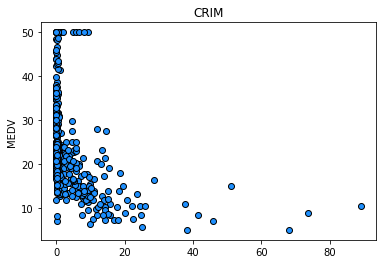

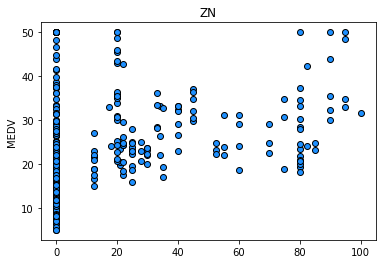

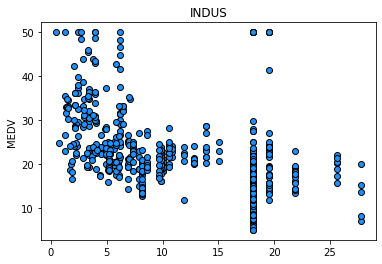

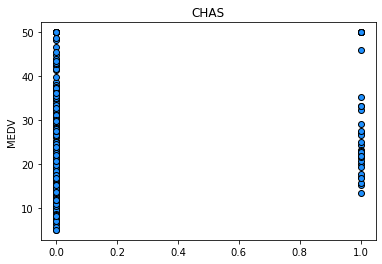

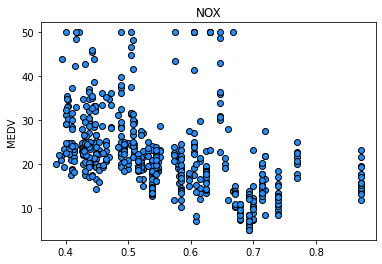

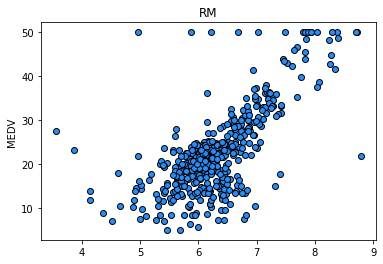

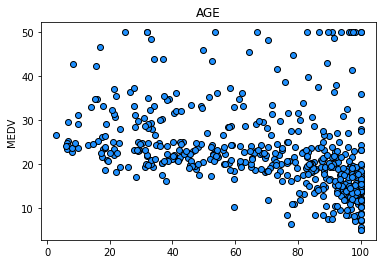

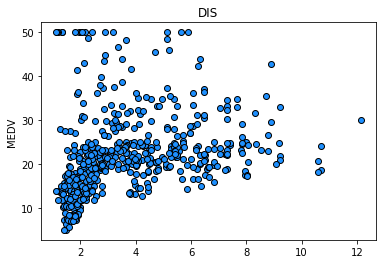

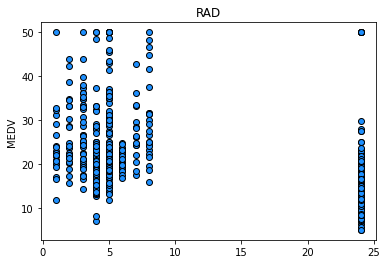

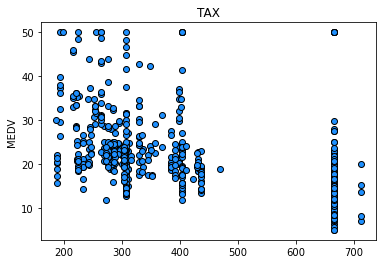

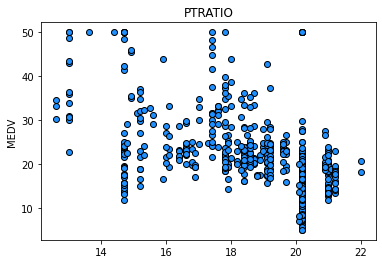

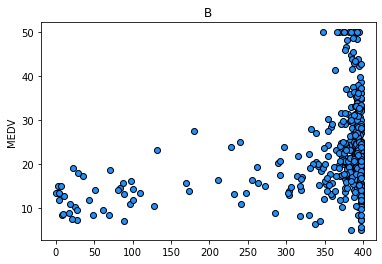

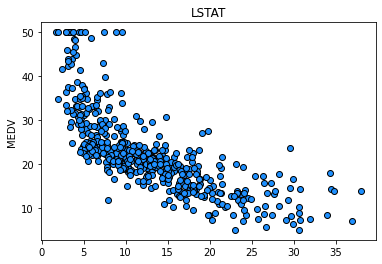

In [7]:

for i in boston['feature_names']:
    feature = i
    selector = (boston['feature_names'] == feature)
    plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.title(feature)
    plt.ylabel('MEDV')
    plt.show()


Se puede observar que algunas variables son mas representativas que otras. Las que muestra una relacion lineal entre el target y la variable son las que mejor van a ayudar a predecir el target. 
Entre ellas podemos destacar en orden de mayor importancia:
1. LSTAT 
2. RM
3. INDUS
4. NOX
5. DIS
6. PRATIO
7. TAX
8. AGE
9. ZN
10. B
11. CRIM
12. RAD
13. CHAS


In [8]:
df=pd.DataFrame(boston['data'], columns=boston['feature_names'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [23]:
feature = 'LSTAT'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [66]:
X_train_f[0]

array([9.71])

In [68]:
degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

In [69]:
pf

PolynomialFeatures()

In [25]:
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

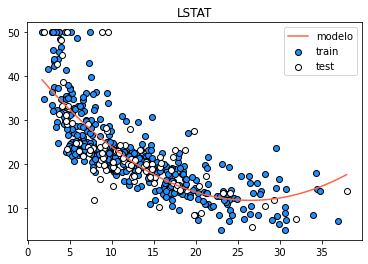

In [26]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.plot(x, model.predict(x), color="tomato", label="modelo")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

In [27]:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

In [37]:
train_error_LSTAT = mean_squared_error(y_train, y_train_pred)
test_error_LSTAT = mean_squared_error(y_test, y_test_pred)
print(f'Train error: ' , train_error_LSTAT.round(2))
print(f'Test error: ', test_error_LSTAT.round(2))

Train error:  37.75
Test error:  39.79


In [29]:
#pruebo ahora con RM
feature = 'RM'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [30]:
degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

In [31]:
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

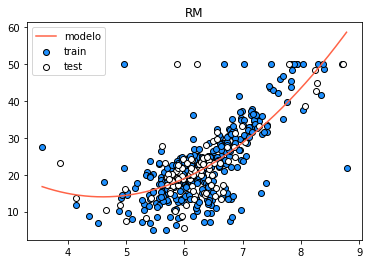

In [32]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.plot(x, model.predict(x), color="tomato", label="modelo")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

In [33]:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

In [39]:
train_error_RM = mean_squared_error(y_train, y_train_pred)
test_error_RM = mean_squared_error(y_test, y_test_pred)
print(f'Train error: ' , train_error_RM.round(2))
print(f'Test error: ', test_error_RM.round(2))

Train error:  37.75
Test error:  39.79


se puede ver que ambas variables tienen un test error parecido.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [55]:
feature = 'LSTAT'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape
list_train_error=[]
list_test_error=[]

for i in range(12):
    degree = i
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    train_error_LSTAT = mean_squared_error(y_train, y_train_pred)
    test_error_LSTAT = mean_squared_error(y_test, y_test_pred)
    print('Train error: ' , train_error_LSTAT.round(2), 'grado del polinomio ', i)
    print('Test error: ', test_error_LSTAT.round(2), 'grado del polinomio ', i)
    list_train_error.append(train_error_LSTAT)
    list_test_error.append(test_error_LSTAT)

Train error:  85.14 grado del polinomio  0
Test error:  81.58 grado del polinomio  0
Train error:  36.52 grado del polinomio  1
Test error:  46.34 grado del polinomio  1
Train error:  28.19 grado del polinomio  2
Test error:  38.85 grado del polinomio  2
Train error:  26.78 grado del polinomio  3
Test error:  37.22 grado del polinomio  3
Train error:  25.85 grado del polinomio  4
Test error:  34.7 grado del polinomio  4
Train error:  25.03 grado del polinomio  5
Test error:  34.83 grado del polinomio  5
Train error:  25.01 grado del polinomio  6
Test error:  34.33 grado del polinomio  6
Train error:  25.01 grado del polinomio  7
Test error:  34.26 grado del polinomio  7
Train error:  24.85 grado del polinomio  8
Test error:  36.42 grado del polinomio  8
Train error:  24.83 grado del polinomio  9
Test error:  34.88 grado del polinomio  9
Train error:  30.52 grado del polinomio  10
Test error:  57.54 grado del polinomio  10
Train error:  57.83 grado del polinomio  11
Test error:  518.82 

In [50]:
list_test_error

[81.58231743908232,
 46.33630536002592,
 38.8468686617072,
 37.22424226844235,
 34.70486859809247,
 34.83470819975125,
 34.32620655098849,
 34.26112076819592,
 36.4158883668847,
 34.88481955229651,
 57.53707291022849,
 518.8151335064782]

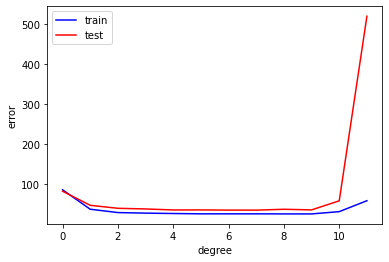

In [49]:
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11], list_train_error, color="blue", label="train")
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11], list_test_error, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

se puede ver como el overfitting comienza luego del grado del polinomio 9. Sin embargo se cree que el mejor modelo es el del grado 2 de polinomio ya que luego el error disminuye muy lentamente lo cual no tiene sentido seguir aumentando el grado, y asi tambien se tiene una complejidad menor de polinomio. Sin embargo se muestra el polinomio con el menor error en test el cual es el 9.

In [57]:
    degree = 9
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    train_error_LSTAT = mean_squared_error(y_train, y_train_pred)
    test_error_LSTAT = mean_squared_error(y_test, y_test_pred)
    print('Train error: ' , train_error_LSTAT.round(2), 'grado del polinomio ', 9)
    print('Test error: ', test_error_LSTAT.round(2), 'grado del polinomio ', 9)
    list_train_error.append(train_error_LSTAT)
    list_test_error.append(test_error_LSTAT)

Train error:  24.83 grado del polinomio  9
Test error:  34.88 grado del polinomio  9


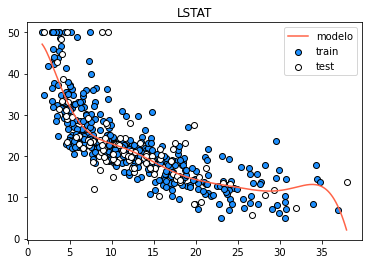

In [58]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.plot(x, model.predict(x), color="tomato", label="modelo")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [134]:
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'INDUS')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [136]:
for i in range(1,10):
    degree = i
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    train_error_conj = mean_squared_error(y_train, y_train_pred)
    test_error_conj = mean_squared_error(y_test, y_test_pred)
    print('Train error: ' , train_error_conj.round(2), 'grado del polinomio ', i)
    print('Test error: ', test_error_conj.round(2), 'grado del polinomio ', i)
    

Train error:  28.37 grado del polinomio  1
Test error:  38.84 grado del polinomio  1
Train error:  13.87 grado del polinomio  2
Test error:  26.88 grado del polinomio  2
Train error:  10.57 grado del polinomio  3
Test error:  28.16 grado del polinomio  3
Train error:  9.21 grado del polinomio  4
Test error:  31.08 grado del polinomio  4
Train error:  8.26 grado del polinomio  5
Test error:  41.76 grado del polinomio  5
Train error:  6.8 grado del polinomio  6
Test error:  63.74 grado del polinomio  6
Train error:  6.13 grado del polinomio  7
Test error:  9550.81 grado del polinomio  7
Train error:  5.07 grado del polinomio  8
Test error:  4893.75 grado del polinomio  8
Train error:  4.23 grado del polinomio  9
Test error:  2281.78 grado del polinomio  9


se obtuvieron mejores modelos ya que los errores son menores y el grado que mejor se adapta es el grado 2, habiendo overfitting si se aumenta el mismo.

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [111]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [168]:
selector = ((boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'ZN') 
| (boston['feature_names'] == 'INDUS')| (boston['feature_names'] == 'CHAS') | (boston['feature_names'] == 'NOX') 
| (boston['feature_names'] == 'RM')|(boston['feature_names'] == 'AGE') | (boston['feature_names'] == 'DIS') 
| (boston['feature_names'] == 'RAD')| (boston['feature_names'] == 'TAX') | (boston['feature_names'] == 'PTRATIO')
| (boston['feature_names'] == 'B') | (boston['feature_names'] == 'LSTAT'))
X_train_fs2 = X_train[:, selector]
X_test_fs2 = X_test[:, selector]
X_train_fs2.shape, X_test_fs2.shape

((404, 13), (102, 13))

In [143]:
for i in range(1,5):
    degree = i
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs2,y_train)
    y_train_pred = model.predict(X_train_fs2)
    y_test_pred = model.predict(X_test_fs2)
    train_error_conj = mean_squared_error(y_train, y_train_pred)
    test_error_conj = mean_squared_error(y_test, y_test_pred)
    print('Train error: ' , train_error_conj.round(2), 'grado del polinomio ', i)
    print('Test error: ', test_error_conj.round(2), 'grado del polinomio ', i)
    

Train error:  19.33 grado del polinomio  1
Test error:  33.45 grado del polinomio  1
Train error:  4.34 grado del polinomio  2
Test error:  31.28 grado del polinomio  2
Train error:  0.0 grado del polinomio  3
Test error:  976576.39 grado del polinomio  3
Train error:  0.0 grado del polinomio  4
Test error:  950756.91 grado del polinomio  4


### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

In [152]:
clf= Ridge(alpha=1.0,fit_intercept=False)
clf

Ridge(fit_intercept=False)

In [154]:
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [172]:
from sklearn.pipeline import Pipeline

degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
clf= Ridge(alpha=1.0,fit_intercept=False)
estimators = [('polinomial features', pf), 
              ('linear reg', lr), 
              ('ridge', clf)]
pipe = Pipeline(estimators)
pipe

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'LinearRegression(fit_intercept=False)' (type <class 'sklearn.linear_model._base.LinearRegression'>) doesn't

In [171]:

for i in range(1,5):
    degree = i
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    clf= Ridge(alpha=1.5,fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs2,y_train)
    clf.fit(X_train_fs2,y_train)
    y_train_pred = model.predict(X_train_fs2)
    y_train_pred = clf.predict(X_train_fs2)
    y_test_pred = model.predict(X_test_fs2)
    y_test_pred = clf.predict(X_test_fs2)
    train_error_conj = mean_squared_error(y_train, y_train_pred)
    test_error_conj = mean_squared_error(y_test, y_test_pred)
    print('Train error: ' , train_error_conj.round(2), 'grado del polinomio ', i)
    print('Test error: ', test_error_conj.round(2), 'grado del polinomio ', i)

Train error:  21.69 grado del polinomio  1
Test error:  36.13 grado del polinomio  1
Train error:  21.69 grado del polinomio  2
Test error:  36.13 grado del polinomio  2
Train error:  21.69 grado del polinomio  3
Test error:  36.13 grado del polinomio  3
Train error:  21.69 grado del polinomio  4
Test error:  36.13 grado del polinomio  4
